# Imports

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob
import imageio
print("imports done")


imports done


# Quick look at the data

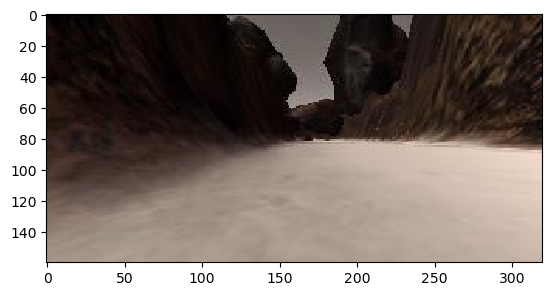

In [2]:
path='../Data/IMG/*'
img_list=glob.glob(path)
idx=np.random.randint(0,len(img_list)-1)
image=mpimg.imread(img_list[idx])
plt.imshow(image)

# Calibration Data

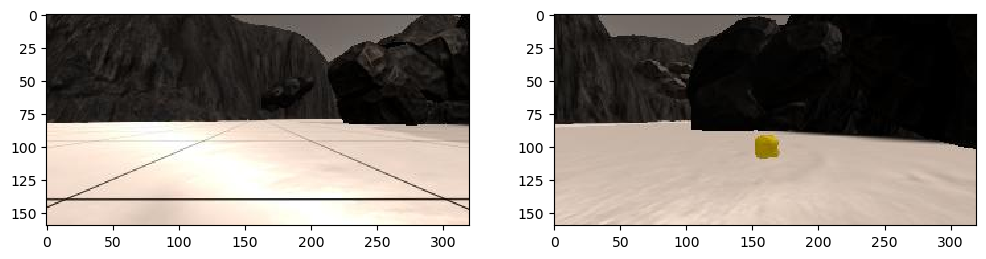

In [3]:
example_grid="../calibration_images/example_grid1.jpg"
example_rock="../calibration_images/example_rock1.jpg"
grid_img=mpimg.imread(example_grid)
rock_img=mpimg.imread(example_rock)
fig=plt.figure(figsize=(12,3))
plt.subplot(121)
plt.imshow(grid_img)
plt.subplot(122)
plt.imshow(rock_img)

# Prespective transform

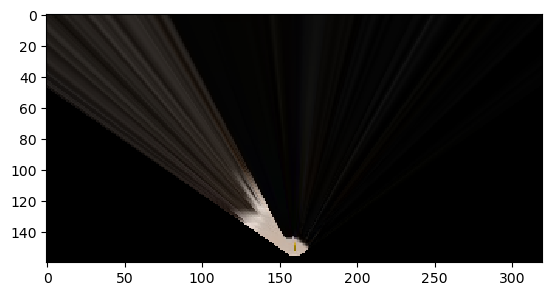

In [4]:
def prespecttransform(img,src,dest):
    
    m=cv2.getPerspectiveTransform(src,dest)
    warped=cv2.warpPerspective(img,m,((img.shape[1]),img.shape[0]))
    return warped
dst_size=3
buttomofset=5
src=np.float32([[14,140],[300,140],[200,95],[120,95]])
desti=np.float32([[image.shape[1]/2-dst_size, image.shape[0]-buttomofset],[image.shape[1]/2+dst_size,image.shape[0]-buttomofset],[image.shape[1]/2+dst_size,image.shape[0]-2*dst_size-buttomofset],[image.shape[1]/2-dst_size,image.shape[0]-2*dst_size-buttomofset]])
warped=prespecttransform(rock_img,src,desti)
plt.imshow(warped)    
    

# Color Threshholding


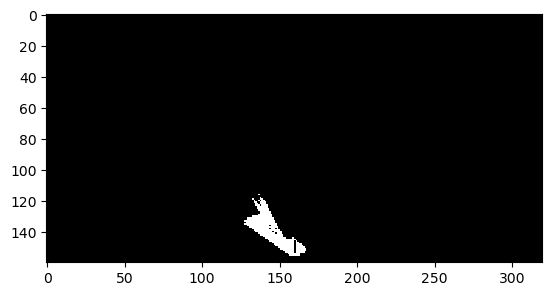

In [5]:
def color_thresh (img, rgb_thresh=(160,160,160)):
    color_select=np.zeros_like(img[:,:,0])
    above_thresh=(img[:,:,0]>rgb_thresh[0])\
    &(img[:,:,1]>rgb_thresh[1])\
    &(img[:,:,2]>rgb_thresh[2])
    color_select[above_thresh]=1
    return color_select
threshhold=color_thresh(warped)
plt.imshow(threshhold, cmap='gray')
    
    


# adjust to world coordinates

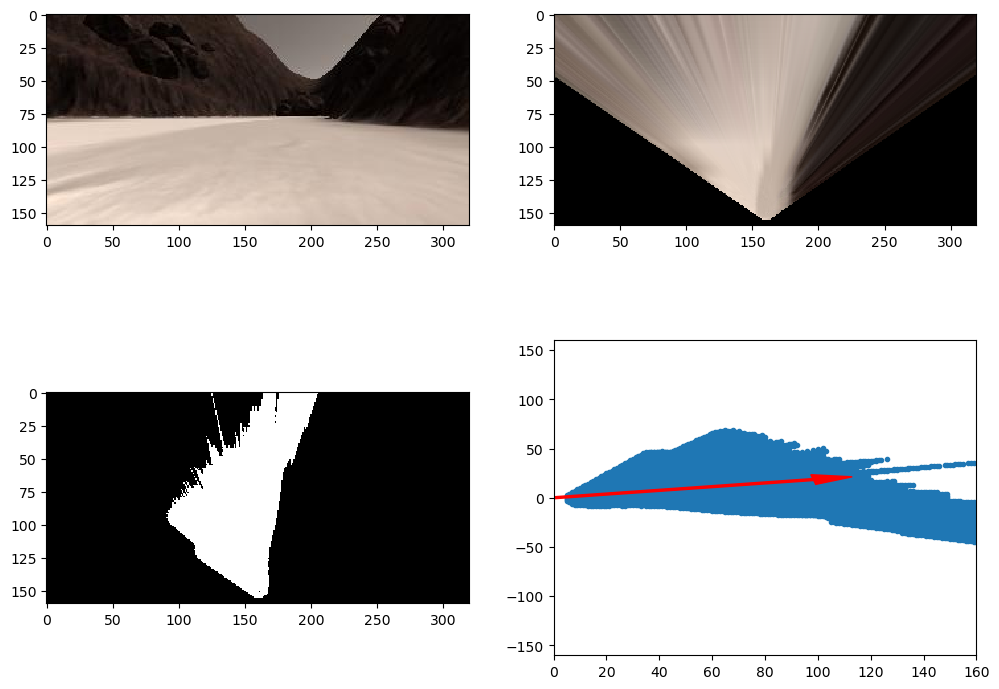

In [6]:
def rover_coords(binary_img):
    ypos, xpos=binary_img.nonzero()
    x_pixel=-(ypos-binary_img.shape[0]).astype(np.float32)
    y_pixel=-(xpos-binary_img.shape[0]).astype(np.float32)
    return x_pixel, y_pixel
def to_polar_coords(x_pixel, y_pixel):
    dist= np.sqrt(x_pixel**2 + y_pixel**2)
    angles=np.arctan2(y_pixel,x_pixel)
    return dist, angles
def rotate_pix(xpix, ypix, yaw):
    yaw_rad= yaw * np.pi / 180
    xpix_rotated=(xpix * np.cos(yaw_rad)- ypix * np.sin(yaw_rad))
    ypix_rotated=(xpix * np.sin(yaw_rad)- ypix * np.cos(yaw_rad))
    return xpix_rotated, ypix_rotated
def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale):
    xpix_translated=(xpos_rot) + xpos
    ypix_translated=(ypos_rot) + ypos
    return xpix_translated, ypix_translated
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    
    
    return xpix_world, ypix_world

idx= np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
warped=prespecttransform(image, src, desti)
threshed = color_thresh(warped)

xpix, ypix = rover_coords(threshed)
dist, angles = to_polar_coords(xpix, ypix)
mean_dir = np.mean(angles)

fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(threshed, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(mean_dir)
y_arrow = arrow_length * np.sin(mean_dir)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)


